In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from mlptools.io.read import read_from_n2p2_data
from mlptools.utils.constants import  ZERO_POINT_ENERGY_SILICON_ESPRESSO

from typing import List
from mlptools.atoms.atom import MLPAtoms

def get_energy_atomic_distance_df(dimer_list: List[MLPAtoms]):
    energy_atomic_distance_dict = {
        "energy": [dimer.energy for dimer in dimer_list],
        "atomic_distance": [dimer.get_atomic_distance() for dimer in dimer_list]
    }
    energy_atomic_distance_df = pd.DataFrame(energy_atomic_distance_dict)
    energy_atomic_distance_df = energy_atomic_distance_df.sort_values("atomic_distance")
    energy_atomic_distance_df = energy_atomic_distance_df.reset_index(drop=True)
    return energy_atomic_distance_df

In [2]:
# all_mlpatoms = read_from_n2p2_data("/Users/y1u0d2/Google Drive/マイドライブ/HamaLab_kotani/n2p2/Si/100/data")
all_mlpatoms = read_from_n2p2_data("/Users/y1u0d2/desktop/Lab/result/lammps/models/Si/30")

mlpatoms_structure_id_dict = {}

for mlpatoms in all_mlpatoms:
    if mlpatoms_structure_id_dict.get(mlpatoms.structure_id) is None:
        mlpatoms_structure_id_dict[mlpatoms.structure_id] = []
    mlpatoms_structure_id_dict[mlpatoms.structure_id].append(mlpatoms)

for k, v in mlpatoms_structure_id_dict.items():
    print(k, len(v))

0 / 41237
1000 / 41237
2000 / 41237
3000 / 41237
4000 / 41237
5000 / 41237
6000 / 41237
7000 / 41237
8000 / 41237
9000 / 41237
10000 / 41237
11000 / 41237
12000 / 41237
13000 / 41237
14000 / 41237
15000 / 41237
16000 / 41237
17000 / 41237
18000 / 41237
19000 / 41237
20000 / 41237
21000 / 41237
22000 / 41237
23000 / 41237
24000 / 41237
25000 / 41237
26000 / 41237
27000 / 41237
28000 / 41237
29000 / 41237
30000 / 41237
31000 / 41237
32000 / 41237
33000 / 41237
34000 / 41237
35000 / 41237
36000 / 41237
37000 / 41237
38000 / 41237
39000 / 41237
40000 / 41237
41000 / 41237
amorphous 11983
mp-1079649 3712
mp-149 7170
diamond 2482
mp-571520 3352
mp-165 6426
mp-92 5222
mp-slab 561
mp-three 100
mp-four 149
mp-149_dimer 80


In [3]:
energy_atomic_distance_df_30 = get_energy_atomic_distance_df(mlpatoms_structure_id_dict["mp-149_dimer"])

In [4]:
all_mlpatoms = read_from_n2p2_data("/Users/y1u0d2/desktop/Lab/result/lammps/models/Si/18")

mlpatoms_structure_id_dict = {}

for mlpatoms in all_mlpatoms:
    if mlpatoms_structure_id_dict.get(mlpatoms.structure_id) is None:
        mlpatoms_structure_id_dict[mlpatoms.structure_id] = []
    mlpatoms_structure_id_dict[mlpatoms.structure_id].append(mlpatoms)

for k, v in mlpatoms_structure_id_dict.items():
    print(k, len(v))

energy_atomic_distance_df_18 = get_energy_atomic_distance_df(mlpatoms_structure_id_dict["mp-149_dimer"])

0 / 55069
1000 / 55069
2000 / 55069
3000 / 55069
4000 / 55069
5000 / 55069
6000 / 55069
7000 / 55069
8000 / 55069
9000 / 55069
10000 / 55069
11000 / 55069
12000 / 55069
13000 / 55069
14000 / 55069
15000 / 55069
16000 / 55069
17000 / 55069
18000 / 55069
19000 / 55069
20000 / 55069
21000 / 55069
22000 / 55069
23000 / 55069
24000 / 55069
25000 / 55069
26000 / 55069
27000 / 55069
28000 / 55069
29000 / 55069
30000 / 55069
31000 / 55069
32000 / 55069
33000 / 55069
34000 / 55069
35000 / 55069
36000 / 55069
37000 / 55069
38000 / 55069
39000 / 55069
40000 / 55069
41000 / 55069
42000 / 55069
43000 / 55069
44000 / 55069
45000 / 55069
46000 / 55069
47000 / 55069
48000 / 55069
49000 / 55069
50000 / 55069
51000 / 55069
52000 / 55069
53000 / 55069
54000 / 55069
55000 / 55069
mp-149 39320
mp-1079649 3653
mp-165 3422
mp-571520 3142
mp-92 5039
mp-slab 261
mp-three 100
mp-four 62
mp-149_dimer 70


# DBに入ってるDimerを見る

In [5]:
# DBから全構造取得する
from mlptools.db.db import get_session
from mlptools.db.model import Structure

ATOMIC_SYMBOL = "Si"
PATH2ATOMS = "/Users/y1u0d2/desktop/Lab/data/qe_data/Si/atoms"

session = get_session(structure_symbol=ATOMIC_SYMBOL)
all_structure = session.query(Structure).all()

In [6]:
# select dimer
import pickle

all_dimer_in_training_dataset = list(filter(lambda x: x.structure_name == "dimer", all_structure))
all_dimer = []
for structure in all_dimer_in_training_dataset:
    atoms = pickle.load(open(os.path.join(PATH2ATOMS ,structure.id, "atoms.pkl"), "rb"))
    all_dimer.append(atoms)

In [7]:
energy_atomic_distance_df_db = get_energy_atomic_distance_df(all_dimer)

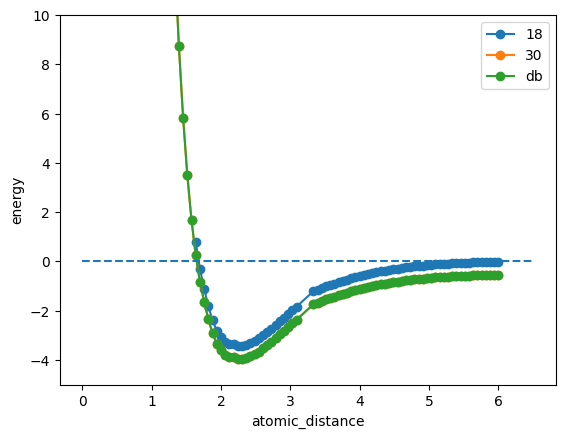

In [9]:
fig, ax = plt.subplots()
ax.plot(energy_atomic_distance_df_18["atomic_distance"], energy_atomic_distance_df_18["energy"]-2*ZERO_POINT_ENERGY_SILICON_ESPRESSO, marker="o", label="18")
ax.plot(energy_atomic_distance_df_30["atomic_distance"], energy_atomic_distance_df_30["energy"]-2*ZERO_POINT_ENERGY_SILICON_ESPRESSO, marker="o", label="30")
ax.plot(energy_atomic_distance_df_db["atomic_distance"], energy_atomic_distance_df_db["energy"]-2*ZERO_POINT_ENERGY_SILICON_ESPRESSO, marker="o", label="db")
# ax.plot(energy_atomic_distance_df_raw["atomic_distance"], energy_atomic_distance_df_raw["energy"]-2*ZERO_POINT_ENERGY_SILICON_ESPRESSO, marker="o", label="raw")
ax.set_xlabel("atomic_distance")
ax.set_ylabel("energy")
ax.set_ylim(-5, 10)
ax.hlines(0, 0, 6.5, linestyles="dashed")
ax.legend()
plt.show()

In [18]:
from glob import glob
from mlptools.io.read import read_from_format

path2dimer_dir = "/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/spin/result"
all_scf_dir = glob(os.path.join(path2dimer_dir, "scf_*"))

all_dimer = []
for scf_dir in all_scf_dir:
    try:
        mlpatoms = read_from_format(scf_dir, "espresso-in")
        all_dimer.append(mlpatoms)
        print(scf_dir, mlpatoms.energy - 2 * ZERO_POINT_ENERGY_SILICON_ESPRESSO)
    except Exception as e:
        print(scf_dir, e)
        continue

/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/spin/result/scf_33 -3.7819902270562125
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/spin/result/scf_34 -3.865658021426043
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/spin/result/scf_60 -1.3703014665591127
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/spin/result/scf_94 -0.5632133177325613
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/spin/result/scf_58 -1.4848092828331119
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/spin/result/scf_93 -0.5677950344909277
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/spin/result/scf_67 -1.0427106911613464
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/spin/result/scf_51 ((2, 0), 18)
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/spin/result/scf_69 -0.968996140724812
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/spin/result/scf_56 -1.6087473402424166
/Users/y1u0d2/desktop/Lab/result/qe/Si/

/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/spin/result/scf_97 -0.5529950349202863
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/spin/result/scf_55 -1.6740576547720138
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/spin/result/scf_52 ((2, 0), 18)
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/spin/result/scf_39 -3.8572558263729206
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/spin/result/scf_37 -3.9548114947265276
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/spin/result/scf_30 -2.9253691961794175
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/spin/result/scf_98 -0.5500828726187592
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/spin/result/scf_53 ((2, 0), 18)
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/spin/result/scf_54 -1.7421258430563284
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/spin/result/scf_96 -0.5558764483578216
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-14

In [11]:
energy_atomic_distance_df_raw = get_energy_atomic_distance_df(all_dimer)

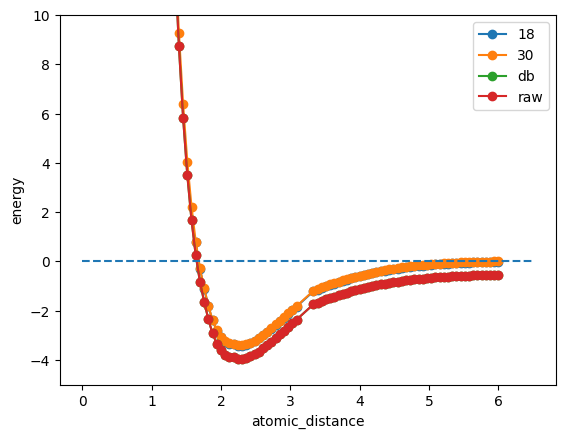

In [14]:
fig, ax = plt.subplots()
ax.plot(energy_atomic_distance_df_18["atomic_distance"], energy_atomic_distance_df_18["energy"]-2*ZERO_POINT_ENERGY_SILICON_ESPRESSO, marker="o", label="18")
ax.plot(energy_atomic_distance_df_30["atomic_distance"], energy_atomic_distance_df_30["energy"]-energy_atomic_distance_df_30["energy"].to_numpy()[-1], marker="o", label="30")
# ax.plot(energy_atomic_distance_df_30["atomic_distance"], energy_atomic_distance_df_30["energy"]-2*ZERO_POINT_ENERGY_SILICON_ESPRESSO, marker="o", label="30")
ax.plot(energy_atomic_distance_df_db["atomic_distance"], energy_atomic_distance_df_db["energy"]-2*ZERO_POINT_ENERGY_SILICON_ESPRESSO, marker="o", label="db")
ax.plot(energy_atomic_distance_df_raw["atomic_distance"], energy_atomic_distance_df_raw["energy"]-2*ZERO_POINT_ENERGY_SILICON_ESPRESSO, marker="o", label="raw")
ax.set_xlabel("atomic_distance")
ax.set_ylabel("energy")
ax.set_ylim(-5, 10)
ax.hlines(0, 0, 6.5, linestyles="dashed")
ax.legend()
plt.show()

In [16]:
# plot two-body-potential with plotly
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=energy_atomic_distance_df_18["atomic_distance"], y=energy_atomic_distance_df_18["energy"]-2*ZERO_POINT_ENERGY_SILICON_ESPRESSO, mode="markers", name="18"))
fig.add_trace(go.Scatter(x=energy_atomic_distance_df_30["atomic_distance"], y=energy_atomic_distance_df_30["energy"]-2*ZERO_POINT_ENERGY_SILICON_ESPRESSO, mode="markers", name="30"))
fig.add_trace(go.Scatter(x=energy_atomic_distance_df_db["atomic_distance"], y=energy_atomic_distance_df_db["energy"]-2*ZERO_POINT_ENERGY_SILICON_ESPRESSO, mode="markers", name="db"))
fig.add_trace(go.Scatter(x=energy_atomic_distance_df_raw["atomic_distance"], y=energy_atomic_distance_df_raw["energy"]-2*ZERO_POINT_ENERGY_SILICON_ESPRESSO, mode="markers", name="raw"))
fig.update_layout(xaxis_title="atomic_distance", yaxis_title="energy")
# set xlim, ylim
fig.update_yaxes(range=[-5, 10])
fig.show()

In [20]:
ZERO_POINT_ENERGY_SILICON_ESPRESSO*2

-1261.944